# Sales price estimation : Modelisation and Optimisation

The dataset describes the sales activity from a marketplace to exchange second-hand products between buyers and sellers. The first columns are describing the characteristics of the products, then 2 columns are measuring the popularity of the products, and the last columns indicate the time online, if the product was sold and the associated sales price. 

Based on this dataset, our objective is to estimate a sales price given the product attributes. This estimated sales price should be both attractive for buyers and sellers, in order to **maximise the number of transactions in the marketplace**, but also to **fullfill the best customer satisfaction**.

## Modelisation to recommend attractive prices :

<div class="alert alert-block alert-info">
<b>Main note:</b>
<p></br>In this part, I will describe the <b>Python code</b> that I have done to estimate the sell price of an item.
<p></br>The code structure has been thought to <b>facilitate iterative testing</b> (agile methodology => working in parallel to improve the dataset and the model).
</div>

>***3 types of Python code with inter-connected functions have been built with specific objectives :***

>- **"_1_Collect_Data.py"** can be executed to load the dataset, clean the data and prepare the features and target data in order to be used by a ML / DL model. Some visualization could be added at the end to check the dataset before the modelization.
>> *Note that the initial loaded data should be in a folder named "data".*


>- **"_2_Train_Model_Lasso.py"** or **"_2_Train_Model_XGBoost.py"** can be executed to train a Lasso Regression model or an XGBoost Regression model based on the previous dataset (prepared and checked in the last step). The modelization is done with hyperparameters tuning on the training set, and the final model is evaluated with the best parameters on the test set to display the results.
>>*Note that the initial parameters for tuning the model should be in a folder named "parameters".*
>>>*Note that the saved models after optimization would be in a folder named "models".*
>>>>*Note that the predictions on the test data would be registered in a folder named "results".*

>- **"_3_Predict_Price_Lasso.py"** or **"_3_Predict_Price_XGBoost.py"** is the final Python code to be executed in order to predict the products prices (once the data have been checked and once the optimized model has been saved). Based on a product file (CSV format) with the corresponding attributes, it returns the price predictions in a new CSV file (using the optimized model saved previously).
>>*Note that the CSV product file to make the predictions should be in a folder named "products".*
>>>*Note that in this first version of code, the CSV product file should contain 3 products (cf. "features_struct").*

<div class="alert alert-block alert-info">
<b>Additional information:</b>
<p></br>Here are some <b>global explanations about these 3 different steps</b>, and how the code conception has been built in order to fulfill the project objective: 
<p></br><b>"=> Recommend product prices that would be both attractive to sellers and buyers".</b>
</div>

**1/ Collect, clean and prepare data :**

The "model" column is dropped (too many NaN values). The few remaining lines with NaN values are deleted. And the duplicates are also deleted.

***To fulfill the objective ("attractive prices for buyers and sellers"), we filter the dataset on "sold" products but also, we introduced a filter on "time_online" in order to target these "attractive prices" :***
- By default, we filter the dataset between **7 days and 30 days** (this interval could be improved).
- Between 0 and 7 days, we eliminate the data because of the **"newness"** effect (somes prices should not be attractive, cf.  the premliminar steps).
- And for the products sold after a given period (after 30 days), somes prices should not be attractive because it takes **too much time to sell**.

**2/ Train model with hyperparameters tuning, and evaluate the model with the best parameters :**

We ***train each model using a Grid search*** on the training set, and select the best parameters to evaluate the model on the test set before to save the optimized model.
Note that the numerical data have been standardized (the corresponding coefficients are also saved to rescale the predicted prices at the end). For information, all the predictions on the test set are extracted in a CSV file (fold "results").

RMSE is the common used metrics. And to evaluate each model at the end (after rescaling the target prices), we introduce the ***MAPE metric that is more adapted considering the business objective.*** This relative metric is the ***mean absolute percentage error***, it means it is not the same to have a 500€ error prediction if the expected price is 1000€ (MAPE = 50 %) than if the expected price is 10 000€ (MAPE = 5%).

2 models have been tested :
- first a **classic Lasso model (Linear)** with feature selection (visualizing the most important features in the dataset).
- then a more advanced **XGBoost model (nonLinear)** (also with analysis about the features used in the regression trees).

(the feature analysis with Lasso and XGBoost is describe in the "Question_3bis" notebook).

***Lasso model :***
The Lasso model was a first good approach to understand the feature weights in a Linear modelisation, but the RMSE on the train set (0.82) was bigger than the RMSE on the test set (0.62). As a consequence, we suppose that this Linear model could be biased in comparison to the dataset size and the important number of features.

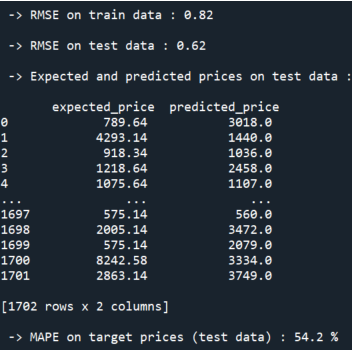

***XGBoost model :*** That is the reason why we tried a new approach with a NonLinear XGBoost model, in order to have better results. With this model, the RMSE on the training set (0.49) was really better than the RMSE on the test set (0.63), meaning that the model is sufficiently complex to learn in the training set, and try to generalize in the test set to avoid the overfitting).

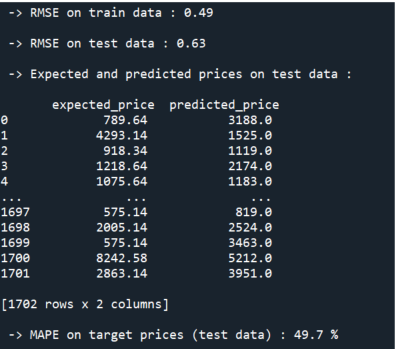

***With this approach using a Non Linear model, the final MAPE metric was improved from 54.2 % to 49.7 %.***

**3/ Predict prices based on a CSV file with product attributes :**

Fill the CSV file "product_list_exple.csv" with the new product attributes for price evaluation (=> think to used 3 product lines only, like in the file example, because this first version of code is not dynamic depending the number of product to evaluate).
As a result in this last step, you will ***find the predicted prices in the CSV file "product_list_result.csv"*** that have been estimated by the optimized saved model (Lasso or XGBoost).

# Conclusion

>As a conclusion, these first modelisations can **estimate an "attractive price" with a MAPE around 50%**. 
>- It means the model performs **very well for 48% of prices in the test set** (=> MAPE +/- 30% maximum compared to the real selling price)
>- The model performs **quite well for 21% of prices in the test set** (=> MAPE between +/-30% and +/-50%)
>- But the model performs **incorrectly for 31% of prices in the test set** (=> MAPE +/- 50% minimum compared to the real selling price)

>The Python code structure is done to **work iteratively in order to improve the dataset selection on the one hand, and the models on the other.**

>We have modelized the **"attractive prices for buyers and sellers" using a filter selection on the variable "time_online"** (as explained in the paragraph "1/ Collect, clean and prepare data"). It reduces the dataset size by 4, but it is interesting to **follow our business objective.**

>To enhance these results, **we could try to gather more data first, but also focus with the business on :**
>- particular **brands/categories/materials** for which prices are easier to estimate **and have a good understand of the key factors** (because of some features for example, or because there is more data available, or because the price range is more restricted).
>- particular **brands/categories/materials** for which prices are complex to estimate **and try to understand why the model is not convenient** (because there are some outliers to delete, or because of a lack of data, or because of a huge price distribution...).
 

